In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [229]:
#2) Tải dữ liệu
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [230]:
#3a) Hiển thị cách đánh index của dữ liệu
print(df.index)


RangeIndex(start=0, stop=303, step=1)


In [231]:
#3b) Danh sách các cột input 
columns_eda = df.columns[:-1]
columns_eda

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

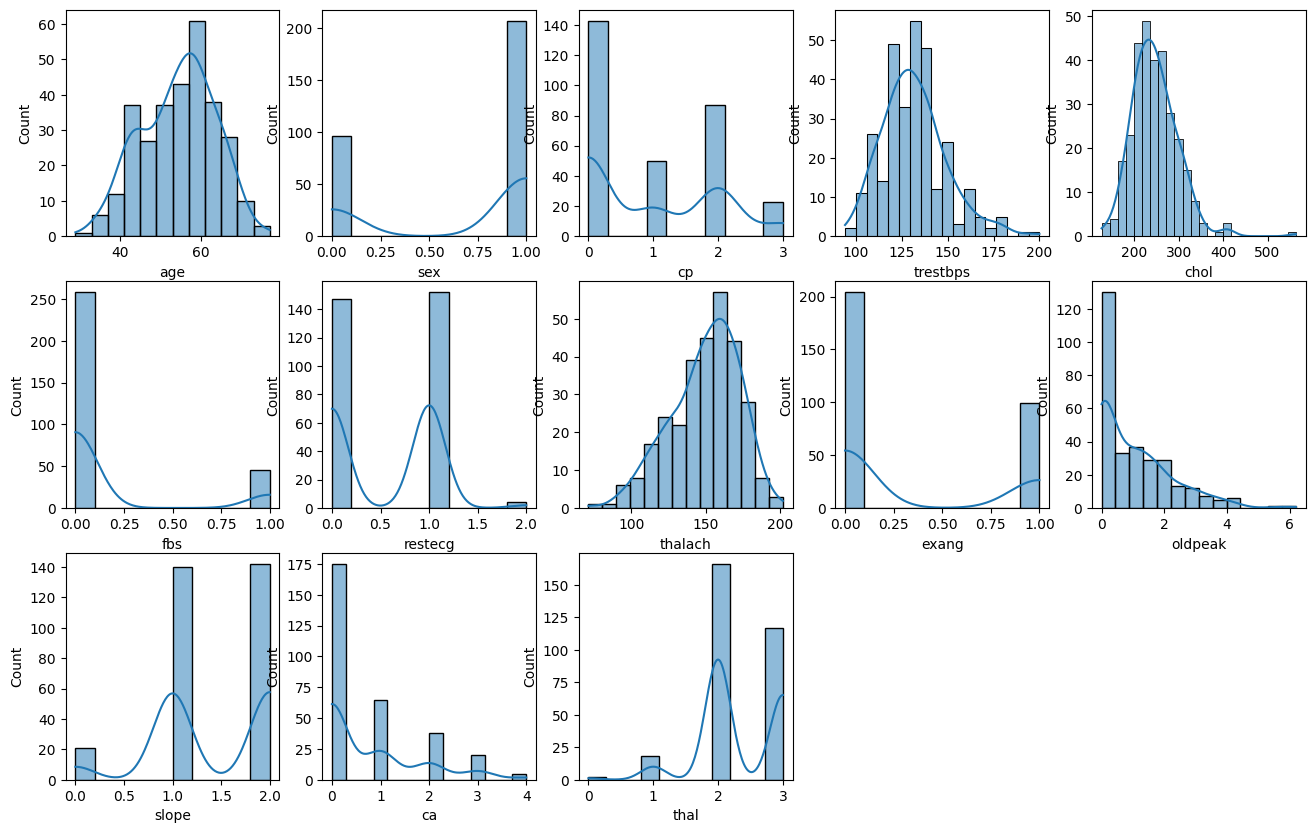

In [232]:
#3c) Phân tích phân phối các biến số input
fig = plt.figure(figsize=(16,10))

for i in range(len(columns_eda)):
    colname = columns_eda[i]
    sub = fig.add_subplot(3, 5, i+1)
    sns.histplot(data=df, x=colname, kde=True)

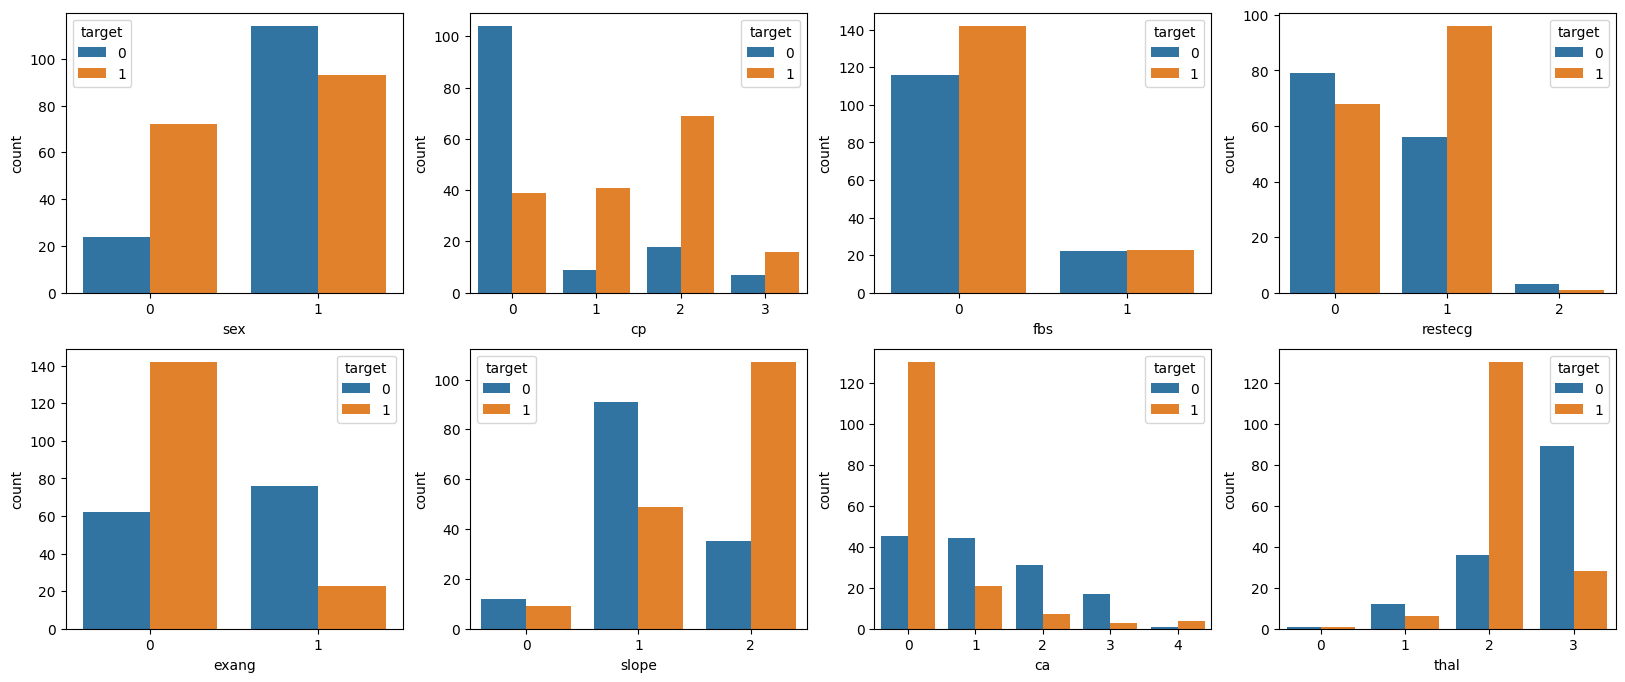

In [233]:
#3d) Đếm xem số lượng các biến input (nhóm định tính) theo biến mục tiêu
categories_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig = plt.figure(figsize=(20,8))

for i in range(len(categories_list)):
    colname = categories_list[i]
    sub = fig.add_subplot(2, 4, i+1)
    sns.countplot(data=df, x=colname, hue="target")

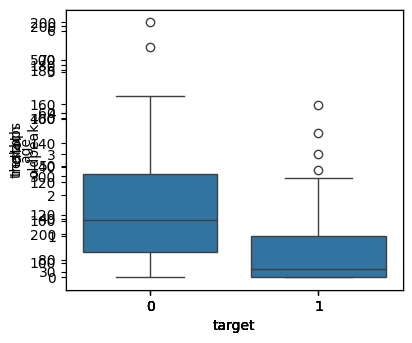

In [234]:
#3e) Phân tích biểu đồ Box-plot các biến input (nhóm định lượng) theo biến mục tiêu
numeric_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig = plt.figure(figsize=(20,8))

for i in range(len(numeric_list)):
    colname = numeric_list[i]
    sub = fig.add_subplot(2,4,1+1)
    sns.boxplot(data=df,y=colname, x="target")

In [260]:
#4a) Chuẩn bị dữ liệu
X = df.iloc[:,:-1].values
y = df[['target']].values
X = X.astype(float)
y = y.astype(float)

In [236]:
#4b) Phân chia tập dữ liệu thành hai phần train và test tỉ lệ 80:20 và hệ số random là 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [237]:
#4c) Hiển thị danh sách index của các sample trong tập X_train, X_test
print("Index của các mẫu trong tập X_train:")
print(X_train)
print("------------------------------------")
print("Index của các mẫu trong tập X_test:")
print(X_test)


Index của các mẫu trong tập X_train:
[[42.  1.  1. ...  2.  0.  2.]
 [58.  1.  0. ...  2.  0.  3.]
 [46.  1.  2. ...  1.  0.  2.]
 ...
 [69.  1.  3. ...  1.  1.  2.]
 [46.  1.  0. ...  2.  0.  3.]
 [63.  0.  1. ...  2.  2.  2.]]
------------------------------------
Index của các mẫu trong tập X_test:
[[5.70e+01 1.00e+00 0.00e+00 1.50e+02 2.76e+02 0.00e+00 0.00e+00 1.12e+02
  1.00e+00 6.00e-01 1.00e+00 1.00e+00 1.00e+00]
 [5.90e+01 1.00e+00 3.00e+00 1.70e+02 2.88e+02 0.00e+00 0.00e+00 1.59e+02
  0.00e+00 2.00e-01 1.00e+00 0.00e+00 3.00e+00]
 [5.70e+01 1.00e+00 2.00e+00 1.50e+02 1.26e+02 1.00e+00 1.00e+00 1.73e+02
  0.00e+00 2.00e-01 2.00e+00 1.00e+00 3.00e+00]
 [5.60e+01 0.00e+00 0.00e+00 1.34e+02 4.09e+02 0.00e+00 0.00e+00 1.50e+02
  1.00e+00 1.90e+00 1.00e+00 2.00e+00 3.00e+00]
 [7.10e+01 0.00e+00 2.00e+00 1.10e+02 2.65e+02 1.00e+00 0.00e+00 1.30e+02
  0.00e+00 0.00e+00 2.00e+00 1.00e+00 2.00e+00]
 [5.70e+01 1.00e+00 2.00e+00 1.50e+02 1.68e+02 0.00e+00 1.00e+00 1.74e+02
  0.00e+00 1.6

In [238]:
#4d) Huấn luyện mô hình
knn = KNeighborsClassifier(n_neighbors=8, algorithm="ball_tree")
knn.fit(X_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8)

In [239]:
#4e) Đánh giá mô hình trên tập test bằng độ đo accuracy
knn.score(X_test, y_test)

0.6885245901639344

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: 

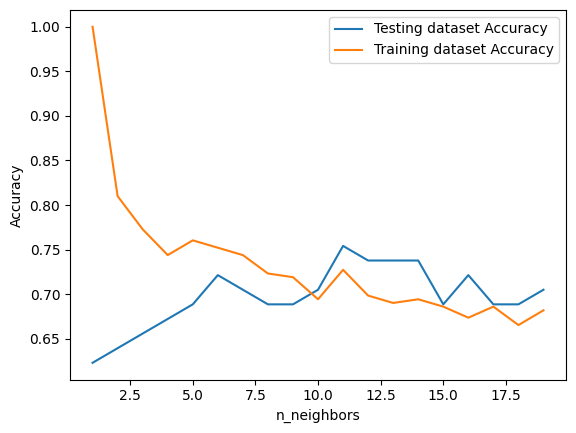

In [240]:
#4f) Sử dụng độ đo đánh giá accuracy trên tập train và test để so sánh và chọn lựa K bao nhiêu là tốt nhất cho mô hình K-NN. Sinh viên nhìn biểu đồ để trả lời
import numpy as np
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy')
plt.show()

In [241]:
#5) Xây dựng lại mô hình với K là tốt nhất dựa trên câu 4f. Sau đó, sử dụng kết quả đó để giải quyết từ câu 6 trở đi.
# Tìm giá trị K tốt nhất (giá trị K có độ chính xác trên tập test cao nhất)
knn_best = neighbors[np.argmax(test_accuracy)]
print(f"Giá trị K tốt nhất là: {knn_best}")


Giá trị K tốt nhất là: 11


In [242]:
# Xây dựng lại mô hình K-NN với K tốt nhất
knn_best = KNeighborsClassifier(n_neighbors=knn_best, algorithm="ball_tree")
knn_best.fit(X_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=11)

In [243]:
#6) In ra danh sách khoảng cách và các hàng xóm từ các mẫu dữ liệu trong tập test từ mô hình ở câu 5
distances, indices = knn_best.kneighbors(X_test)

# In ra khoảng cách và các hàng xóm cho từng mẫu trong tập kiểm tra
for i in range(len(X_test)):
    print(f"Mẫu test {i+1}:")
    print(f"  Khoảng cách đến các hàng: {distances[i]}")
    print(f"  Chỉ số của các hàng trong tập huấn luyện: {indices[i]}")
    print()

Mẫu test 1:
  Khoảng cách đến các hàng: [ 6.63626401 17.93906352 18.22882333 23.23122898 24.27673784 27.23894271
 28.29416901 28.8159678  31.74649587 32.21241996 32.83230117]
  Chỉ số của các hàng trong tập huấn luyện: [  1  79 161 222 211  25 217 166 103 111  88]

Mẫu test 2:
  Khoảng cách đến các hàng: [20.96759404 21.51650529 26.15415837 27.35616932 27.89336839 28.93095228
 31.43580761 32.57299495 34.21461676 35.98555266 36.39725264]
  Chỉ số của các hàng trong tập huấn luyện: [179 101  89  70 167  92   7 149 114 221 172]

Mẫu test 3:
  Khoảng cách đến các hàng: [46.55276576 46.92589903 53.2169146  54.00962877 54.00962877 54.46503466
 61.48788499 61.61980201 61.91413409 62.66450351 62.98761783]
  Chỉ số của các hàng trong tập huấn luyện: [195 148 147  34  19 106 176 216 158  98 100]

Mẫu test 4:
  Khoảng cách đến các hàng: [15.49870962 18.20466973 18.77471704 56.31349749 58.30686066 58.89388763
 68.9890571  70.70509175 73.89594035 75.21043811 78.1422421 ]
  Chỉ số của các hàng trong

In [244]:
#7) Cho biết sample input đầu tiên trong tập test sẽ lần lượt gần K (hàng xóm) dòng nào trong tập train tính theo index và khoảng cách tương đương theo độ đo Euclidean là bao nhiêu?
# Lấy khoảng cách và hàng xóm của mẫu đầu tiên trong tập test
distances_first_sample, indices_first_sample = knn_best.kneighbors([X_test[0]])

# In ra kết quả
print(f"Mẫu test đầu tiên gần với các hàng ở tập train theo index: {indices_first_sample[0]}")
print(f"Khoảng cách tương ứng theo Euclidean: {distances_first_sample[0]}")

Mẫu test đầu tiên gần với các hàng ở tập train theo index: [  1  79 161 222 211  25 217 166 103 111  88]
Khoảng cách tương ứng theo Euclidean: [ 6.63626401 17.93906352 18.22882333 23.23122898 24.27673784 27.23894271
 28.29416901 28.8159678  31.74649587 32.21241996 32.83230117]


In [245]:
#8)
# Mẫu input cần kiểm tra
sample_input = np.array([[47, 0, 0, 150, 250, 0, 1, 140, 1, 0.5, 1, 0, 2]])

# Lấy khoảng cách và hàng cho mẫu input
distances_sample, indices_sample = knn_best.kneighbors(sample_input)

# In ra kết quả
print(f"Các hàng gần nhất trong tập train theo index: {indices_sample[0]}")
print(f"Khoảng cách tương ứng theo Euclidean: {distances_sample[0]}")

# Giá trị Age của hàng gần nhất
closest_neighbor_index = indices_sample[0][0]
age_of_closest_neighbor = df.iloc[closest_neighbor_index]['age']
print(f"Giá trị Age của hàng gần nhất: {age_of_closest_neighbor}")


Các hàng gần nhất trong tập train theo index: [168   2 180  11  94  62 172 213  67  66 189]
Khoảng cách tương ứng theo Euclidean: [16.1322658  20.65453945 21.38340478 21.39649504 22.11537926 23.02194605
 23.09567059 23.23790008 23.89748941 24.4705946  24.58149711]
Giá trị Age của hàng gần nhất: 63.0


In [246]:
#9)
# Xem các giá trị duy nhất trong cột target
unique_targets = df['target'].unique()

print("Danh sách các giá trị của lớp đánh nhãn (target):")
print(unique_targets)


Danh sách các giá trị của lớp đánh nhãn (target):
[1 0]


In [247]:
#10)
# Lấy xác suất dự báo cho các mẫu trong tập test
predicted_probabilities = knn_best.predict_proba(X_test)

# Chuyển đổi thành DataFrame để dễ đọc
probabilities_df = pd.DataFrame(predicted_probabilities, columns=["Không có bệnh (0)", "Có bệnh (1)"])

# In ra danh sách xác suất dự báo
print("Danh sách xác suất tiền dự báo cho các mẫu dữ liệu trong tập test:")
print(probabilities_df)


Danh sách xác suất tiền dự báo cho các mẫu dữ liệu trong tập test:
    Không có bệnh (0)  Có bệnh (1)
0            1.000000     0.000000
1            0.454545     0.545455
2            0.454545     0.545455
3            0.454545     0.545455
4            0.636364     0.363636
..                ...          ...
56           0.636364     0.363636
57           0.272727     0.727273
58           0.818182     0.181818
59           0.272727     0.727273
60           0.545455     0.454545

[61 rows x 2 columns]


In [248]:
#11)
# Lấy xác suất dự báo cho mẫu thứ hai trong tập test
second_sample_probabilities = predicted_probabilities[1]  # Chỉ số 1 cho mẫu thứ hai (chỉ số bắt đầu từ 0)

# Xác định nhãn nào có xác suất cao hơn và giá trị tương ứng
if second_sample_probabilities[0] > second_sample_probabilities[1]:
    higher_label = 0  # Không có bệnh
    higher_probability = second_sample_probabilities[0]
    lower_label = 1  # Có bệnh
    lower_probability = second_sample_probabilities[1]
else:
    higher_label = 1  # Có bệnh
    higher_probability = second_sample_probabilities[1]
    lower_label = 0  # Không có bệnh
    lower_probability = second_sample_probabilities[0]

# In kết quả
print(f"Nhãn dự báo cao hơn cho mẫu thứ hai: {higher_label} với xác suất {higher_probability:.2f}")
print(f"Nhãn thấp hơn: {lower_label} với xác suất {lower_probability:.2f}")


Nhãn dự báo cao hơn cho mẫu thứ hai: 1 với xác suất 0.55
Nhãn thấp hơn: 0 với xác suất 0.45


In [249]:
#12)
# Dự đoán nhãn cho các mẫu dữ liệu trong tập test
y_test_predicted = knn_best.predict(X_test)

# In danh sách các nhãn dự báo
print("Danh sách các nhãn dự báo cho các mẫu dữ liệu trong tập test:")
print(y_test_predicted)

# Kết quả dự báo của mẫu input thứ 5
predicted_label_fifth_sample = y_test_predicted[4]  # Chỉ số 4 cho mẫu thứ 5 (chỉ số bắt đầu từ 0)
print(f"Kết quả dự báo của mẫu input thứ 5 trong tập test: {predicted_label_fifth_sample}")


Danh sách các nhãn dự báo cho các mẫu dữ liệu trong tập test:
[0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0.]
Kết quả dự báo của mẫu input thứ 5 trong tập test: 0.0


In [250]:
#13)
# Đặt ngưỡng xác suất
threshold = 0.65

# Lấy xác suất dự đoán cho các mẫu input tương ứng
probabilities_for_samples = predicted_probabilities[[1, 4, 5]]  # Mẫu thứ 2, 5, 6

# Khởi tạo danh sách kết quả dự đoán dựa trên ngưỡng
custom_predictions = []

# Lặp qua các mẫu và áp dụng ngưỡng
for prob in probabilities_for_samples:
    if prob[1] >= threshold:  # Xác suất cho nhãn "1"
        custom_predictions.append(1)
    else:
        custom_predictions.append(0)

# In kết quả
print(f"Kết quả dự báo với ngưỡng {threshold} cho mẫu input thứ 2: {custom_predictions[0]}")
print(f"Kết quả dự báo với ngưỡng {threshold} cho mẫu input thứ 5: {custom_predictions[1]}")
print(f"Kết quả dự báo với ngưỡng {threshold} cho mẫu input thứ 6: {custom_predictions[2]}")


Kết quả dự báo với ngưỡng 0.65 cho mẫu input thứ 2: 0
Kết quả dự báo với ngưỡng 0.65 cho mẫu input thứ 5: 0
Kết quả dự báo với ngưỡng 0.65 cho mẫu input thứ 6: 1


In [251]:
#14) Hãy đánh giá mô hình trên tập test qua Confussion – Matrix
cfmx = confusion_matrix(y_test, y_test_predicted)
cfmx


array([[20,  9],
       [ 6, 26]], dtype=int64)

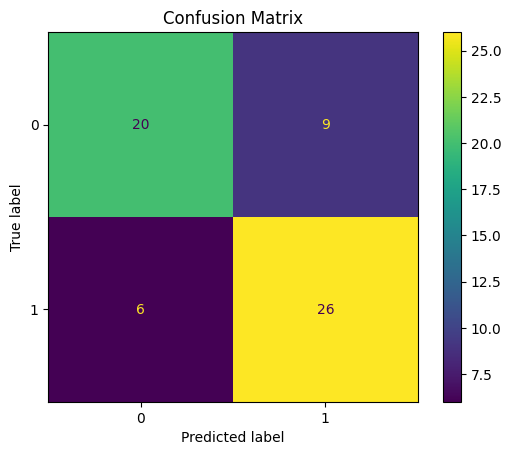

Confusion Matrix:
[[20  9]
 [ 6 26]]


In [262]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Dự đoán nhãn trên tập test với ngưỡng xác suất
y_pred = knn_best.predict(X_test)

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Hiển thị confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix")
plt.show()

# In ra giá trị của confusion matrix
print("Confusion Matrix:")
print(cm)

In [253]:
# Các giá trị từ ma trận nhầm lẫn
TP = 26
TN = 20
FP = 9
FN = 6

# Tính toán các chỉ số
sensitivity = TP / (TP + FN)  # Độ nhạy
specificity = TN / (TN + FP)  # Độ chính xác
accuracy = (TP + TN) / (TP + TN + FP + FN)  # Độ chính xác tổng thể

# Đánh giá giá trị quan trọng nhất
if FN > FP:
    important_value = "False Negatives (FN)"
else:
    important_value = "False Positives (FP)"

# In ra kết quả
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"The most important value in this prediction problem is: {important_value}")


Sensitivity: 0.8125
Specificity: 0.6897
Accuracy: 0.7541
The most important value in this prediction problem is: False Positives (FP)


In [254]:
# Giả sử y_true là nhãn thực tế và y_pred là nhãn dự đoán
y_true = [1]*26 + [0]*20 + [1]*6 + [0]*9  # Tạo nhãn thực tế
y_pred = [1]*26 + [1]*9 + [0]*6 + [0]*20  # Tạo nhãn dự đoán

# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Tính toán các chỉ số
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Độ chính xác:", accuracy)
print("Độ chính xác (Precision):", precision)
print("Tỉ lệ hồi phục (Recall):", recall)
print("Điểm F1 (F1-Score):", f1)


Confusion Matrix:
 [[20  9]
 [ 6 26]]
Độ chính xác: 0.7540983606557377
Độ chính xác (Precision): 0.7428571428571429
Tỉ lệ hồi phục (Recall): 0.8125
Điểm F1 (F1-Score): 0.7761194029850748


In [255]:
#17)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73        29
         1.0       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



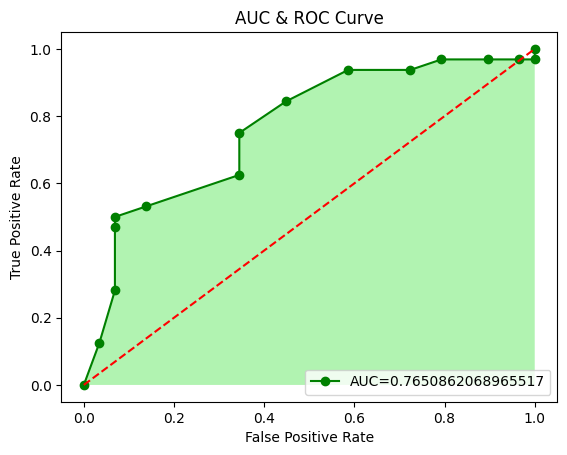

In [256]:
#18)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

y_pred_proba = knn.predict_proba(X_test) [:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, 'go-', label="AUC="+str(auc))
plt.plot([0,1], [0,1], 'r--')
plt.title("AUC & ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between (fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.show()


In [257]:
#Đánh giá:
#Với giá trị AUC = 0.765, mô hình của bạn có khả năng phân loại khá ổn, dự đoán dương tính đúng cao hơn nhiều so với dự đoán dương tính sai.
#Đường ROC nằm cao hơn nhiều so với đường chéo đỏ, cho thấy mô hình có khả năng phân biệt tốt giữa hai lớp.

Accuracy: 0.7049
Confusion Matrix:
[[27  2]
 [16 16]]
[TN, FP, FN, TP]: [27, 2, 16, 16]
[TPR, FNR, FPR, TNR]: [0.5000, 0.5000, 0.0690, 0.9310]
[Precision, Recall, F1]: [0.8889, 0.5000, 0.6400]


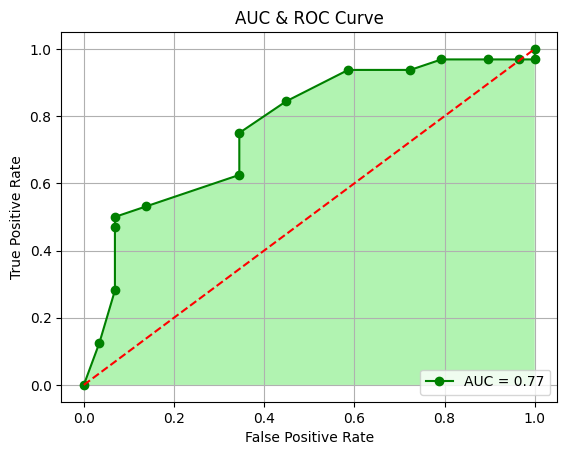

In [258]:
#19)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# Bước 1: Dự đoán xác suất
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Thiết lập ngưỡng
threshold = 0.65
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Bước 2: Tính toán các chỉ số
accuracy = metrics.accuracy_score(y_test, y_pred_threshold)
cfmx = confusion_matrix(y_test, y_pred_threshold)

# Lấy TP, TN, FP, FN từ confusion matrix
TN, FP, FN, TP = cfmx.ravel()

# Tính TPR, FNR, FPR, TNR
TPR = TP / (TP + FN)  # True Positive Rate
FNR = FN / (TP + FN)  # False Negative Rate
FPR = FP / (FP + TN)  # False Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate

# Tính precision, recall, F1-score
precision = TP / (TP + FP)
recall = TPR  # hoặc TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

# In kết quả
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(cfmx)
print(f"[TN, FP, FN, TP]: [{TN}, {FP}, {FN}, {TP}]")
print(f"[TPR, FNR, FPR, TNR]: [{TPR:.4f}, {FNR:.4f}, {FPR:.4f}, {TNR:.4f}]")
print(f"[Precision, Recall, F1]: [{precision:.4f}, {recall:.4f}, {f1:.4f}]")

# Bước 3: Vẽ đồ thị AUC & ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, 'go-', label="AUC = {:.2f}".format(auc))
plt.plot([0, 1], [0, 1], 'r--')  # Đường ngẫu nhiên
plt.title("AUC & ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.grid()
plt.show()


In [259]:
#20)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Đọc dữ liệu từ file CSV
df = pd.read_csv("heart.csv")

# Chuẩn bị dữ liệu
X = df.iloc[:, :-1].values
y = df[['target']].values
X = X.astype(float)
y = y.astype(float)

# Phân chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình K-NN với K = 8
knn = KNeighborsClassifier(n_neighbors=8, algor2ithm="ball_tree")
knn.fit(X_train, y_train)

# Hàm dự đoán bệnh tim
def predict_heart_disease(features, threshold=0.5):
    # Dự đoán xác suất
    prob = knn.predict_proba([features])[0][1]  # Xác suất cho lớp 1
    prediction = 1 if prob >= threshold else 0  # Dự đoán dựa trên ngưỡng
    return prediction, prob

# Hàm chính để chạy ứng dụng
def main():
    print("Nhập các đặc trưng đầu vào để dự đoán bệnh tim:")
    age = float(input("Tuổi (age): "))
    sex = int(input("Giới tính (sex) [0: nữ, 1: nam]: "))
    cp = int(input("Đặc trưng đau ngực (cp) [0-3]: "))
    trestbps = float(input("Huyết áp tâm thu (trestbps): "))
    chol = float(input("Cholesterol (chol): "))
    fbs = int(input("Đường huyết lúc đói (fbs) [0: không, 1: có]: "))
    restecg = int(input("Kết quả điện tâm đồ (restecg) [0-2]: "))
    thalach = float(input("Tốc độ nhịp tim cao nhất (thalach): "))
    exang = int(input("Khó thở khi gắng sức (exang) [0: không, 1: có]: "))
    oldpeak = float(input("ST depression (oldpeak): "))
    slope = int(input("Slope của đoạn ST (slope) [0-2]: "))
    ca = int(input("Số mạch máu (ca) [0-3]: "))
    thal = int(input("Thalassemia (thal) [0: normal, 1: fixed, 2: reversible]: "))

    # Nhập ngưỡng xác suất
    threshold_input = input("Nhập ngưỡng xác suất (default 0.5): ")
    threshold = float(threshold_input) if threshold_input else 0.5

    # Dự đoán
    features = [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
    prediction, prob = predict_heart_disease(features, threshold)

    # In ra kết quả
    if prediction == 1:
        print(f"Dự đoán: Bệnh nhân có khả năng bị bệnh tim. Xác suất: {prob:.2f}")
    else:
        print(f"Dự đoán: Bệnh nhân không có khả năng bị bệnh tim. Xác suất: {prob:.2f}")

if __name__ == "__main__":
    main()


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Nhập các đặc trưng đầu vào để dự đoán bệnh tim:
Dự đoán: Bệnh nhân không có khả năng bị bệnh tim. Xác suất: 0.62
